In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0,0.0,2,2,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,0.0,3,0.0,3,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3,0.0,2,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0.0,2,0.0,2,2,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,0.0,2,0.0,2,0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0,0.0,0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0.0,0,0.0,3,2,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70
355,2,2,2,1,0,0.0,0,0.0,0,0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	3
int64		column 7	0
float64		column 8	9
int64		column 9	0
int64		column 10	0
int64		column 11	0
float64		column 12	12
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
int64		column 17	0
int64		column 18	0
int64		column 19	0
float64		column 20	3
int64		column 21	0
float64		column 22	9
int64		column 23	0
int64		column 24	0
float64		column 25	12
int64		column 26	0
float64		column 27	9
int64		column 28	0
float64		column 29	12
float64		column 30	3
float64		column 31	12
int64		column 32	0
float64		column 33	12
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,355.000000,358.000000,349.000000,358.000000,358.000000,...,346.000000,358.000000,349.000000,358.000000,346.000000,355.000000,346.000000,358.000000,346.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.453521,0.170391,0.381089,0.622905,0.530726,...,0.407514,0.474860,0.472779,0.949721,0.465318,0.107042,0.121387,1.877095,0.569364,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.959613,0.576394,0.834451,0.990278,0.912352,...,0.863999,0.871705,0.969345,1.129060,0.963213,0.457000,0.501886,0.699324,1.114899,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

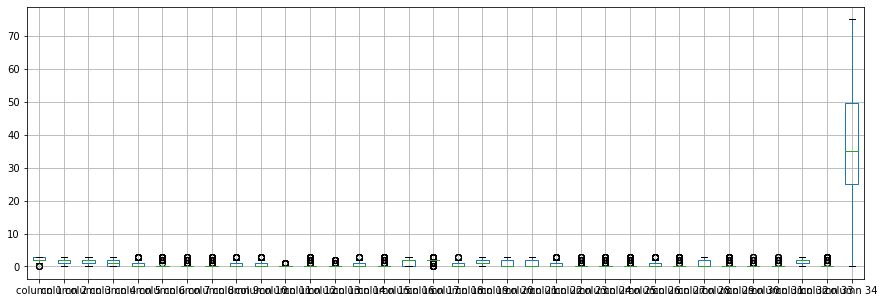

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.453521
column 7      0.170391
column 8      0.381089
column 9      0.622905
column 10     0.530726
column 11     0.122905
column 12     0.421965
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287709
column 20     0.667606
column 21     0.983240
column 22     0.638968
column 23     0.298883
column 24     0.368715
column 25     0.407514
column 26     0.474860
column 27     0.472779
column 28     0.949721
column 29     0.465318
column 30     0.107042
column 31     0.121387
column 32     1.877095
column 33     0.569364
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.027962,-0.115275,-0.007430,0.138519,0.180740,...,-0.006206,0.153229,-0.005485,0.038837,0.009269,-0.011372,0.003124,0.093026,0.003607,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.078529,-0.098665,-0.059417,0.294258,0.295932,...,-0.077557,0.205046,-0.113635,0.023095,-0.100607,-0.016195,-0.016486,-0.008453,-0.121005,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322099,-0.176715,0.301408,0.301187,0.261495,...,0.296325,0.350007,0.290878,-0.252643,0.283458,-0.096123,-0.139262,0.124812,0.287992,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.414039,-0.144027,0.383866,-0.296824,-0.152562,...,0.385559,-0.190548,0.378081,0.003028,0.401086,-0.178131,-0.189708,0.051553,0.408531,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.386608,-0.175676,0.400870,-0.065438,0.013496,...,0.404555,0.002588,0.372266,0.006726,0.385893,-0.152085,-0.172437,0.110295,0.383383,0.081162
column 6,0.027962,-0.078529,0.322099,0.414039,0.386608,1.000000,-0.140746,0.879041,-0.282086,-0.261168,...,0.890924,-0.124912,0.911080,0.094296,0.906874,-0.099192,-0.116454,0.257046,0.912913,0.097139
column 7,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.140746,1.000000,-0.137279,0.220849,-0.007320,...,-0.125257,-0.161487,-0.146608,-0.012624,-0.145900,0.784878,0.844391,-0.093833,-0.140912,-0.371368
column 8,-0.007430,-0.059417,0.301408,0.383866,0.400870,0.879041,-0.137279,1.000000,-0.284053,-0.263343,...,0.884670,-0.100935,0.883044,0.117119,0.870141,-0.085821,-0.111356,0.268201,0.888876,0.108179
column 9,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.282086,0.220849,-0.284053,1.000000,0.659286,...,-0.271328,0.480594,-0.287471,-0.417851,-0.283980,0.233009,0.264242,-0.079246,-0.280024,-0.078267
column 10,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.261168,-0.007320,-0.263343,0.659286,1.000000,...,-0.262421,0.485260,-0.260463,-0.425421,-0.263542,-0.055062,-0.018969,0.027887,-0.255944,0.036412


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [15]:
imputer = md.Midas(layer_structure = [34,34+12,34+12+12,34+12+12+12,34+12+12+12+12,34+12+12+12+12+12,34+12+12+12+12+12+12,34+12+12+12+12+12+12+12,34+12+12+12+12+12+12,34+12+12+12+12+12,34+12+12+12+12,34+12+12+12,34+12+12,34+12,34], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 76.66960178722034
Epoch: 1 , loss: 76.639460476962
Epoch: 2 , loss: 76.5248409618031
Epoch: 3 , loss: 76.41430109197444
Epoch: 4 , loss: 76.31792276555842
Epoch: 5 , loss: 76.05663230202414
Epoch: 6 , loss: 76.23729046908292
Epoch: 7 , loss: 75.50717787309127
Epoch: 8 , loss: 74.67531759088689
Epoch: 9 , loss: 72.40890884399414
Epoch: 10 , loss: 69.6996055949818
Epoch: 11 , loss: 68.72274138710715
Epoch: 12 , loss: 68.21880843422629
Epoch: 13 , loss: 67.61857813054866
Epoch: 14 , loss: 67.0622145912864
Epoch: 15 , loss: 66.89388777992941
Epoch: 16 , loss: 66.97607560591264
Epoch: 17 , loss: 66.6595727747137
Epoch: 18 , loss: 66.46945727955212
Epoch: 19 , loss: 66.16189661892977
Epoch: 20 , loss: 66.04061508178711
Epoch: 21 , loss: 65.92693016745828
Epoch: 22 , loss: 65.7892957167192
Epoch: 23 , loss: 65.8184138211337
Epoch: 24 , loss: 65.56598247181286
Epoch: 25 , loss: 64.94535584883256
Epoch: 26 , lo

In [16]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [17]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [28]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [29]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
1,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
2,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
3,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
4,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
354,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
355,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
356,0,0,0,0,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0


Calculating NRMSE Value

In [30]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [31]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [32]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(6.34702136591433, 758.0725558942231)

In [33]:
NRMS=numerator/denominator
NRMS


0.008372577686086232

In [34]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [35]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0,0.0,2,2,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,0.0,3,0.0,3,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3,0.0,2,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0.0,2,0.0,2,2,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,0.0,2,0.0,2,0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0,0.0,0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0.0,0,0.0,3,2,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70
355,2,2,2,1,0,0.0,0,0.0,0,0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0.0,0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70


In [36]:
imputations[-1].to_excel("DERM_AE_1(imp).xlsx", index=False, header=False)